> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


## Question(s) for Analysis
### 1- Which genres are most popular from year to year? 
### 2- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01  5% |█▉                              | 583kB 20.9MB/s eta 0:00:01    16% |█████▏                          | 1.7MB 22.0MB/s eta 0:00:01    26% |████████▋                       | 2.8MB 23.2MB/s eta 0:00:01    77% |█████████████████████████       | 8.2MB 20.2MB/s eta 0:00:01    88% |████████████████████████████▏   | 9.2MB 22.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01  8% |██▋                             | 1.1MB 22.1MB/s eta 0:00:01    24% |███████▉                        | 3.3MB 21.3MB/s eta 0:00:01    31% |██████████▏                     | 4.3MB 18.1MB/s eta 0:00:01    43% |██████████████                  | 5.9MB 18.3MB/s eta 0:00:01    57% |██████████████████▎             | 7.6MB 18.4MB/s eta 0:00:01    72% |███████████████████████▏        | 9.7MB 21.3MB/s eta 0:00:01    80% |█████████████████████████▉      | 10.8MB 22.2MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning


### check for duplicates

In [5]:
df.duplicated().sum()

1

In [6]:
#since we only have one duplicated row we can drop it
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### check unique values in director

In [7]:
df['director'].nunique()

5067

### dropping columns that are irrelevent to analysis

###  columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time so i will keep thoes and drop budget and revenue.

### many unique directors and production companies so i will also drop them

In [8]:
#drop unwanted columns
columns_to_drop = ['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 
                   'overview', 'keywords', 'budget', 'revenue', 'director', 'cast',
                   'vote_count', 'release_date', 'production_companies']

df.drop(columns = columns_to_drop, inplace=True)

In [9]:
# drop missing values
df.dropna(inplace=True)

### clean genre column , only leave first genre

In [10]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [11]:
df.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Which genres are most popular from year to year? 

In [12]:
year_pop_genre = df.sort_values('popularity').groupby(['release_year']).tail(1).sort_values('release_year')[['release_year','genres']]
year_pop_genre.head()

,release_year,genres
10141,1960,Drama
10110,1961,Adventure
9849,1962,Adventure
10438,1963,Action
9881,1964,Adventure


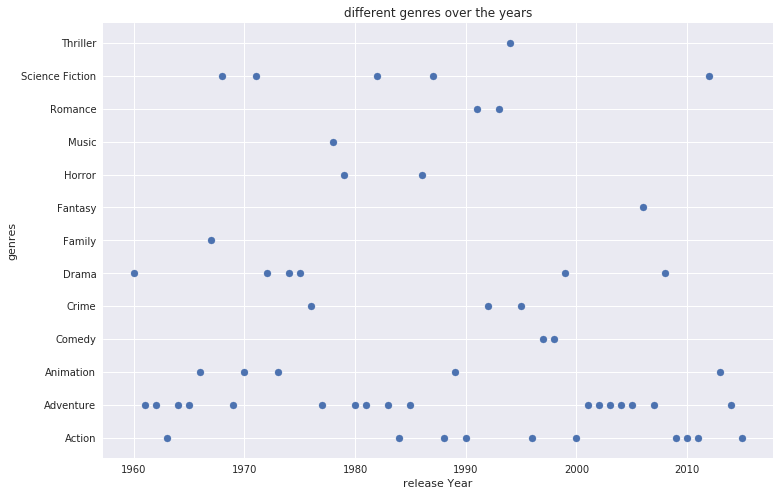

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(x='release_year', y='genres', data=year_pop_genre)
plt.title('different genres over the years')
plt.xlabel('release Year')
plt.ylabel('genres')
plt.show()

Adventure is the most popular genre across the years. we can visualise it better using a bar plot

In [14]:
genres_popularity = year_pop_genre.groupby(['genres']).count()
genres_popularity.columns=['number of years most popular']
genres_popularity

,number of years most popular
genres,
Action,10
Adventure,17
Animation,5
Comedy,2
Crime,3
Drama,6
Family,1
Fantasy,1
Horror,2


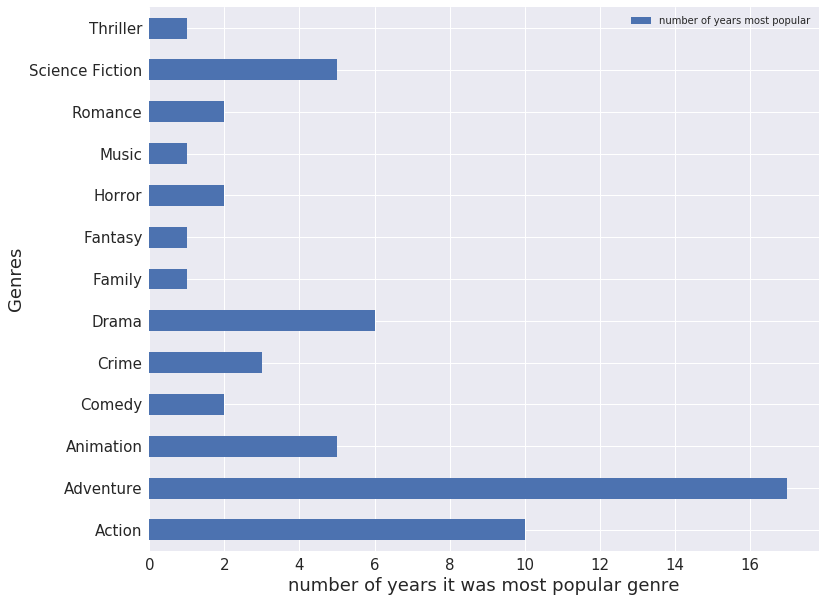

In [15]:
genres_popularity.plot.barh(figsize=(12, 10));
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("number of years it was most popular genre", fontsize=18)
plt.ylabel("Genres", fontsize=18)
plt.show()

# we can conclude that the adventure genre was most popular over the years

### What kinds of properties are associated with movies that have high revenues?

sort movies from most revenue to least

In [16]:
revenue_desc = df.sort_values('revenue_adj', ascending= False)
revenue_desc.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,162,Action,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,121,Adventure,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,194,Drama,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,122,Drama,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,124,Horror,7.3,1975,2.836275e+07,1.907006e+09


### compare most revenue movie and most popular movie

In [17]:
most_popular_movie = df.sort_values('popularity', ascending=False).iloc[0]
most_revenuable_movie= revenue_desc.iloc[0]
print("most popular movie")
print(most_popular_movie)
print("\nmost revenuable movie")
print(most_revenuable_movie)

most popular movie
popularity          32.9858
runtime                 124
genres               Action
vote_average            6.5
release_year           2015
budget_adj         1.38e+08
revenue_adj     1.39245e+09
Name: 0, dtype: object

most revenuable movie
popularity          9.43277
runtime                 162
genres               Action
vote_average            7.1
release_year           2009
budget_adj      2.40887e+08
revenue_adj     2.82712e+09
Name: 1386, dtype: object


### compare popularity between most revenuable and most popular

In [18]:
most_popular_movie['popularity'] - most_revenuable_movie['popularity']

23.552995

* the most revenuable movie is much less popular than the most popular movie

### get top 500 and top100 revenuable movies to check their traits

In [19]:
top500 = revenue_desc.head(500)
top500.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,162,Action,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,121,Adventure,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,194,Drama,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,122,Drama,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,124,Horror,7.3,1975,2.836275e+07,1.907006e+09


In [20]:
top100 = revenue_desc.head(100)
top100.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,162,Action,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,121,Adventure,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,194,Drama,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,122,Drama,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,124,Horror,7.3,1975,2.836275e+07,1.907006e+09


### check runtime of top 500 revenuable movies

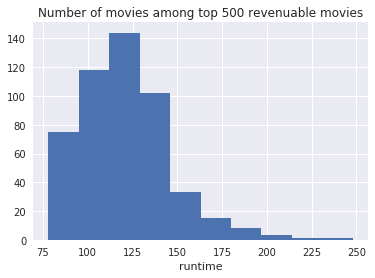

In [21]:
top500['runtime'].hist()
plt.xlabel('runtime')
plt.title('Number of movies among top 500 revenuable movies')
plt.show()

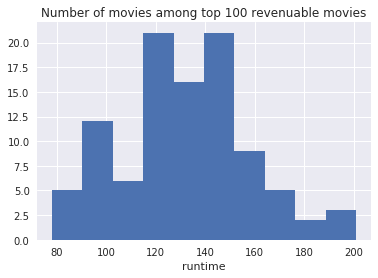

In [22]:
top100['runtime'].hist()
plt.xlabel('runtime')
plt.title('Number of movies among top 100 revenuable movies')
plt.show()

runtime is between 120 and 150 mins for top revenuable movies

### function to plot mean of given column of top100, top500 and all movies 

In [23]:
def plot_mean(col,title, legend, ylabel):
    """
    plots the mean average of given column for top100 revenuable movies, top500 and all movies
    input: column, title to show on plot, legends, ylabel 
    no return value
    output is the plot
    
    """
    plt.bar(1, top100[col].mean(), color='red');
    plt.bar(2, top500[col].mean(), color='black');
    plt.bar(3, revenue_desc[col].mean(), color='blue');
    plt.ylabel('mean '+col);
    plt.title(title)
    plt.ylabel(ylabel)
    plt.legend(legend);

### mean runtime 

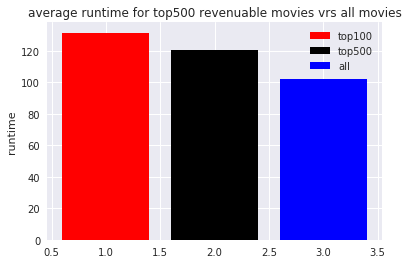

In [24]:
ylabel = 'runtime'
title = 'average runtime for top500 revenuable movies vrs all movies'
plot_mean('runtime', title, ['top100', 'top500', 'all'], ylabel)

the most revenuable movies have higher mean runtime

# investigate budget

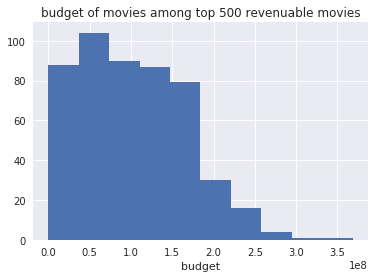

In [25]:
top500['budget_adj'].hist()
plt.xlabel('budget')
plt.title('budget of movies among top 500 revenuable movies')
plt.show()

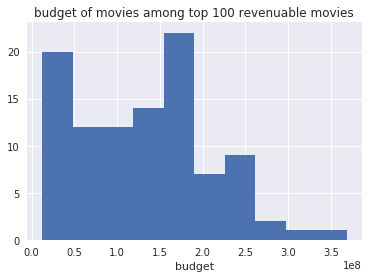

In [26]:
top100['budget_adj'].hist()
plt.xlabel('budget')
plt.title('budget of movies among top 100 revenuable movies')
plt.show()

the most revenuable movies have budgets arounf 1.5 and 2 million

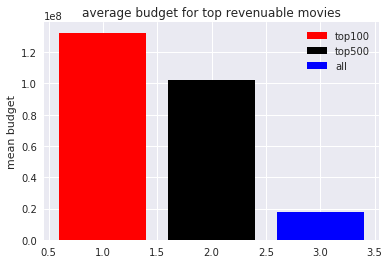

In [27]:
title ='average budget for top revenuable movies'
legend = ['top100', 'top500', 'all']
ylabel = 'mean budget'
plot_mean('budget_adj', title, legend, ylabel)

### most revenuable movies tend to have higher avg budget

# investigate votes

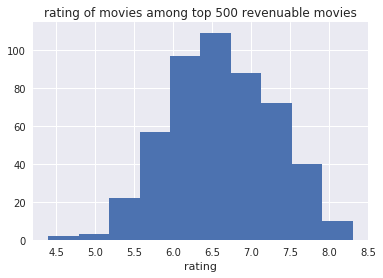

In [28]:
top500['vote_average'].hist()
plt.xlabel('rating')
plt.title('rating of movies among top 500 revenuable movies')
plt.show()

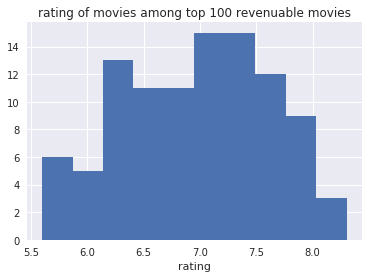

In [29]:
top100['vote_average'].hist()
plt.xlabel('rating')
plt.title('rating of movies among top 100 revenuable movies')
plt.show()

the most revenuable movies have rating around 7 and 7.5

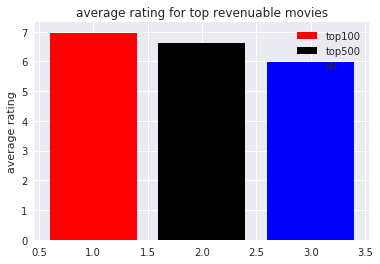

In [30]:
title = 'average rating for top revenuable movies'
legend=['top100', 'top500' ,'all']
ylabel='average rating'
plot_mean('vote_average', title, legend, ylabel)


the most revenuable movies have higher average rating 

<a id='conclusions'></a>
## Conclusions


###  we can conclude that the adventure genre was most popular over the years
###  the most revenuable movie is much less popular than the most popular movie
###  most revenuable movies have an higher average runtime between(120 and 150 mins)
###  most revenuable movies have an higher average budget between(1.5 and 2 million)
###  most revenuable movies have an higher average rating between (7 and 7.5)

# limitations
### * couldn't get correlation between cast, director or production companies and the movies due to many unique values
### * outliers in dataset could be affecting output mean of top revenuable movies

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0